# Regression and Classification using PyTorch
---

In this notebook, we will be having a look at the how to perform regression and classification using PyTorch, using neural networks. 

## Importing Dependencies
---

Let us begin by importing all the necesary dependencies.

In [21]:
import torch
from torch import nn, optim
import random
import numpy
import math
from IPython import display

from res.plot_lib import *
from matplotlib import pyplot as plt

In [2]:
# initializing the default plotting behaviour
set_default()

In [3]:
# setting the default device as the GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

Now, let us create the data that we will be using for the regression task.

In [13]:
# Setting seed as 1 fixes the random nature of PyTorch and 
# random module to generate the same "random" data each time
seed = 1
random.seed(1)
torch.manual_seed(seed)
N = 1_000 # number of samples per class
D = 1 # dimensions
C = 1 # number of classes
H = 100 # number of hidden units

# generating the data and the x and y matrices
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1).to(device)
y = x.pow(3) + 0.3 * torch.rand(x.size()).to(device)

Now that we have generated the data, let us move on to the next step where we will try to fit a linear regression (and later a polynomial regression model) to the data.

## Regression
---

In a regression task, the aim is to find a line that roughly estimates the distribution of the data in a multi-dimensional space, using the various features available. 

Talking in terms of matrices, each row within the matrix can be thought of as a data instance. On the other hand, the columns of the matrix can be thought of as the features. 

Let us now see how to perform regression using PyTorch.

In [16]:
# setting the learning rate
learn_rate = 1e-3
# setting the l2 norm hyperparameter
lambda_l2 = 1e-5

In [17]:
# creating the sequential model
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C),                 
)

# moving the model to GPU (if CUDA is available)
model.to(device)

# declaring the loss function
criterion = nn.MSELoss()

# setting up the optimization function with l2 regularization
optimizer = torch.optim.SGD(model.parameters(), lr=learn_rate, weight_decay=lambda_l2)

Now that we have defined the model, the optimizer function and the loss function, let us move on to the training part.

In [24]:
# setting the number of training epochs
num_epochs = 1_001

# training
for epoch in range(num_epochs):
    
    # generating the predictions
    y_hat = model(x)
    
    # computing the loss
    loss = criterion(y_hat, y)
    if epoch % 100 == 0:
        print(f"EPOCH: {epoch}    LOSS: {loss.item()}")
    
    # resetting the gradients
    optimizer.zero_grad()
    
    ## backpropagation step
    # calculation of loss gradients
    loss.backward()
    # gradient optimization
    optimizer.step()

EPOCH: 0    LOSS: 0.02970065549015999
EPOCH: 100    LOSS: 0.02970065549015999
EPOCH: 200    LOSS: 0.02970065549015999
EPOCH: 300    LOSS: 0.02970065549015999
EPOCH: 400    LOSS: 0.02970065549015999
EPOCH: 500    LOSS: 0.02970065549015999
EPOCH: 600    LOSS: 0.02970065549015999
EPOCH: 700    LOSS: 0.02970065549015999
EPOCH: 800    LOSS: 0.02970065549015999
EPOCH: 900    LOSS: 0.02970065549015999
EPOCH: 1000    LOSS: 0.02970065549015999


In [25]:
# plotting the trained model
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=1, bias=True)
)


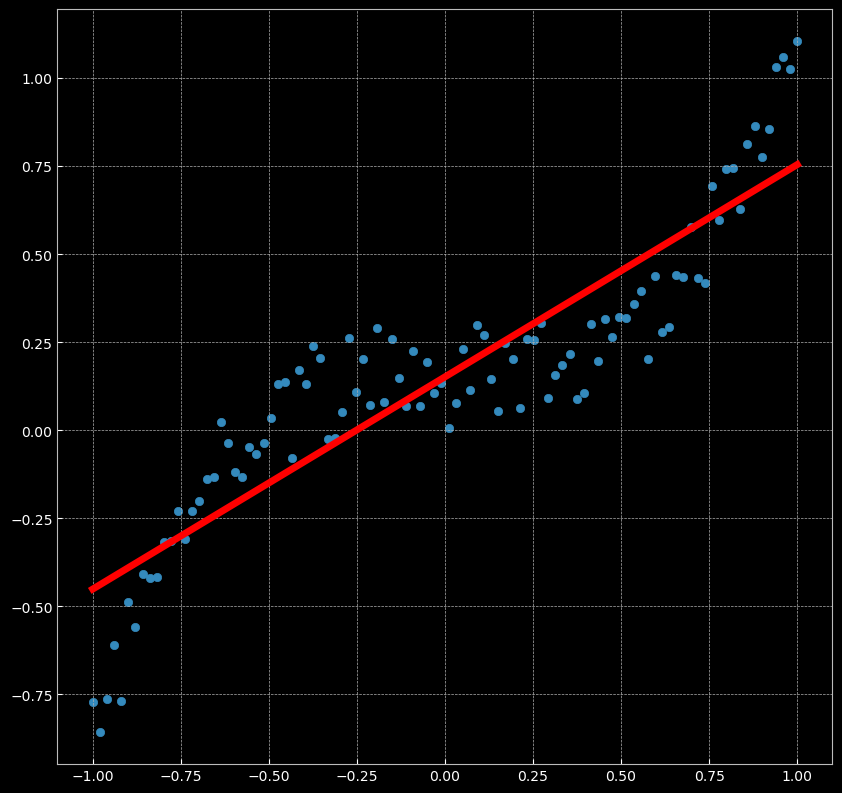

In [28]:
# pl
plt.scatter(x.data.cpu().numpy(), y.data.cpu().numpy())
plt.plot(x.data.cpu().numpy(), y_hat.data.cpu().numpy(), 'r-', lw=5)
plt.axis('equal');